# **Obdachlosigkeit im globalen Vergleich**

# 1. Fragestellung und Datenbeschaffung

**1.1 Team:**
- Jasleen Bal
- Luana Birtone
- Katarina Djuric

**1.2 Fragestellung**

- Welche Länder waren in den Jahren 2018 -2023 am meisten von der Obdachlosigkeit betroffen?
- Was sind Gründe für die Obdachlosigkeit in jeweiligen Länder?

**1.3 Datenquellen**
- [OurWorldInData_Obdachlosigkeit](https://ourworldindata.org/grapher/homelessness-rate-point-in-time-count)
- [OurWorldInData_Population](https://ourworldindata.org/grapher/population-with-un-projections?tab=table&globe=1&globeRotation=65%2C-50.69) 


# 2. Daten beschaffen und laden

In [5]:
import pandas as pd
from matplotlib import pyplot as plt

**2.1 Obdachlosigkeit**  
Die Tabelle zeigt die Top 10 Länder mit der höchsten Obdachlosigkeit ETHOS 2 und 3

Definitionen:  
- ETHOS = European Typology of Homelessness and Housing Exclusion  
- ETHOS 1 = Obdachlose auf der Straße (keine Unterkunft)
- ETHOS 2 = Unterkunft in Notunterkünften
- ETHOS 3 = Unterbringung in Einrichtungen für bestimmte soziale Zwecke


In [6]:
Obdachlosigkeit = pd.read_csv('homelessness-rate-point-in-time-count.csv')
Obdachlosigkeit = Obdachlosigkeit.rename(columns={"Rate of people experiencing homelessness (point-in-time, ETHOS 2 and 3)":"Obdachlosigkeit ETHOS 2 und 3", "Entity":"Land", "Year":"Jahr", "Rate of people experiencing homelessness (point-in-time, ETHOS 1)":"Obdachlosigkeit ETHOS 1"})
Obdachlosigkeit.drop("Rate of people experiencing homelessness (point-in-time, ETHOS 1, 2 and 3)", axis=1, inplace=True)
Obdachlosigkeit["Obdachlosigkeit ETHOS 1, 2 und 3"] = Obdachlosigkeit["Obdachlosigkeit ETHOS 1"].fillna(0) + Obdachlosigkeit["Obdachlosigkeit ETHOS 2 und 3"]
Obdachlosigkeit_sortiert = Obdachlosigkeit.sort_values(by="Obdachlosigkeit ETHOS 2 und 3", ascending=False)
Obdachlosigkeit_sortiert.head(10)

,Land,Code,Jahr,Obdachlosigkeit ETHOS 1,Obdachlosigkeit ETHOS 2 und 3,"Obdachlosigkeit ETHOS 1, 2 und 3"
20,United Kingdom,GBR,2023,16.498774,409.802730,426.301504
6,France,FRA,2022,8.095070,298.781680,306.876750
10,Ireland,IRL,2023,NaN,253.438260,253.438260
7,Germany,DEU,2022,45.943825,212.534940,258.478765
3,Czechia,CZE,2022,85.877396,198.428830,284.306226
13,New Zealand,NZL,2018,4.223972,130.759490,134.983462
21,United States,USA,2023,75.547935,116.730850,192.278785
0,Australia,AUS,2021,29.737530,94.549700,124.287230
1,Canada,CAN,2022,23.891660,80.688620,104.580280
4,Denmark,DNK,2022,9.051570,54.190987,63.242557


In [14]:
Population = pd.read_csv("population-with-un-projections.csv")
Population = Population.rename(columns={"Entity":"Land", "Year":"Jahr", "Population - Sex: all - Age: all - Variant: estimates":"Einwohnerzahl" })
Population.drop("Population - Sex: all - Age: all - Variant: medium", axis=1, inplace=True)
Population.head(10)

,Land,Code,Jahr,Einwohnerzahl
0,Afghanistan,AFG,1950,7776180.0
1,Afghanistan,AFG,1951,7879343.0
2,Afghanistan,AFG,1952,7987784.0
3,Afghanistan,AFG,1953,8096703.0
4,Afghanistan,AFG,1954,8207954.0
5,Afghanistan,AFG,1955,8326981.0
6,Afghanistan,AFG,1956,8454303.0
7,Afghanistan,AFG,1957,8588340.0
8,Afghanistan,AFG,1958,8723412.0
9,Afghanistan,AFG,1959,8869270.0


In [111]:
merged=pd.merge(Obdachlosigkeit_sortiert, Population, how='inner', on= ["Land", "Jahr", "Code"]).round(2)
merged["Obdachlose_absolut"] = (merged["Obdachlosigkeit ETHOS 1, 2 und 3"] / 100000 * merged["Einwohnerzahl"]).round(2)
merged["Obdachlosenrate in %"] = (merged["Obdachlosigkeit ETHOS 1, 2 und 3"]/100000*100).round(4)
merged.drop("Obdachlosigkeit ETHOS 1", axis=1, inplace=True)
merged.drop("Obdachlosigkeit ETHOS 2 und 3", axis=1, inplace=True)
merged.drop("Code", axis=1, inplace=True)
merged_Top10 = merged.sort_values(by="Obdachlosenrate in %", ascending=False).head(10)
merged_Top10.head(10)

,Land,Jahr,"Obdachlosigkeit ETHOS 1, 2 und 3",Einwohnerzahl,Obdachlose_absolut,Obdachlosenrate in %
0,United Kingdom,2023,426.30,68682965.0,292795.48,0.4263
1,France,2022,306.88,66277412.0,203392.12,0.3069
4,Czechia,2022,284.31,10673216.0,30345.02,0.2843
3,Germany,2022,258.48,84086227.0,217346.08,0.2585
2,Ireland,2023,253.44,5196629.0,13170.34,0.2534
6,United States,2023,192.28,343477330.0,660438.21,0.1923
5,New Zealand,2018,134.98,4900840.0,6615.15,0.1350
7,Australia,2021,124.29,25956417.0,32261.23,0.1243
8,Canada,2022,104.58,38821259.0,40599.27,0.1046
9,Denmark,2022,63.24,5902901.0,3732.99,0.0632


<Axes: title={'center': 'Obdachlosigkeit pro Land'}, xlabel='Land', ylabel='Obdachlosenrate in %'>

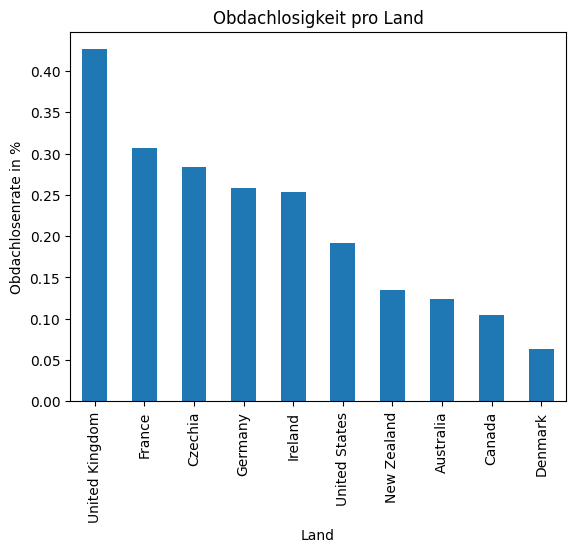

In [104]:
merged_Top10.plot.bar(x="Land", y="Obdachlosenrate in %", ylabel="Obdachlosenrate in %", legend=False, title="Obdachlosigkeit pro Land")

# 3. Statistik der Roh-Daten (Analyse im Long-Format)

über die einzelnen Spalten kann folgendes ausgesagt werden:



### 3.1 Analyse Gebiete

In [10]:
print('Anzahl verschieder Länder der Quelle mit der Anzahl obdachlosen Personen: ', len(Obdachlosigkeit['Land'].unique()))


Anzahl verschieder Länder der Quelle mit der Anzahl obdachlosen Personen:  22


In [12]:
print("Anzahl Länder:", len(Obdachlosigkeit["Land"].unique()))
Obdachlosigkeit["Land"].value_counts()


Anzahl Länder: 22


Land
Australia         1
Canada            1
United Kingdom    1
Sweden            1
Spain             1
South Korea       1
Portugal          1
Poland            1
Norway            1
New Zealand       1
Mexico            1
Japan             1
Ireland           1
Iceland           1
Greece            1
Germany           1
France            1
Finland           1
Denmark           1
Czechia           1
Costa Rica        1
United States     1
Name: count, dtype: int64